In [1]:
from google.colab import files
files.upload()
# check to see if the file is there
!ls -lha kaggle.json
# install Kaggle API
!pip install kaggle --upgrade
# move file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change permissions
!chmod 600 ~/.kaggle/kaggle.json
# download dataset 
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 64 Jan 26 04:31 kaggle.json
Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.10)
  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 93.3MB/s]
 34% 9.00M/26.3M [00:00<00:00, 23.8MB/s]
100% 26.3M/26.3M [00:00<00:00, 48.9MB/s]
 38% 9.00M/23.4M [00:00<00:00, 25.4MB/s]
100% 23.4M/23.4M [00:00<00:00, 47.7MB/s]
  0% 0.00/1.46M [00:00<?, ?B/s]
100% 1.46M/1.46M [00:00<00:00, 207MB/s]


In [2]:
#unzip dataset
!unzip train.csv.zip
!unzip test.csv.zip
!unzip test_labels.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  test_labels.csv.zip
  inflating: test_labels.csv         


In [3]:
classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

In [4]:
import pandas as pd
import numpy as np
training= pd.read_csv('train.csv', sep=',')
validation = pd.read_csv('test.csv', sep = ',')
test_labels = pd.read_csv('test_labels.csv', sep = ',')

In [5]:
training.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
validation.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [7]:
test_labels.head(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1
5,0001ea8717f6de06,0,0,0,0,0,0
6,00024115d4cbde0f,-1,-1,-1,-1,-1,-1
7,000247e83dcc1211,0,0,0,0,0,0
8,00025358d4737918,-1,-1,-1,-1,-1,-1
9,00026d1092fe71cc,-1,-1,-1,-1,-1,-1


In [9]:
import re

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt   

def preprocess(x, y):
  x[y] = np.vectorize(remove_pattern)(x[y], "@[\w]*")
  x[y] = x[y].str.replace("[^a-zA-Z#]", " ")
  x[y] = x[y].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

preprocess(training, 'comment_text')
preprocess(validation, 'comment_text')

In [10]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
  
training['comment_text'] = training['comment_text'].apply(removeStopWords)
validation['comment_text'] = validation['comment_text'].apply(removeStopWords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
labels = training[classes].values
print(labels.shape)

(159571, 6)


In [12]:
# do not run more than once!
test_labels = test_labels[classes].replace(0, 1)
test_labels = test_labels[classes].replace(-1, 0)

In [44]:
testlabels = test_labels[classes].values
print(testlabels.shape)

(153164, 6)


In [43]:
test_labels.head(10)

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,1,1,1,1,1,1
6,0,0,0,0,0,0
7,1,1,1,1,1,1
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [104]:
training.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation edits made username Hardcore Meta...,0,0,0,0,0,0
1,000103f0d9cfb60f,matches background colour seemingly stuck Th...,0,0,0,0,0,0
2,000113f07ec002fd,really trying edit constantly removing rele...,0,0,0,0,0,0
3,0001b41b1c6bb37e,make real suggestions improvement wondered se...,0,0,0,0,0,0
4,0001d958c54c6e35,hero chance remember page that,0,0,0,0,0,0
5,00025465d4725e87,Congratulations well tools well talk,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER PISS AROUND WORK,1,1,1,0,1,0
7,00031b1e95af7921,vandalism Matt Shirvington article reverted ...,0,0,0,0,0,0
8,00037261f536c51d,Sorry word nonsense offensive Anyway intending...,0,0,0,0,0,0
9,00040093b2687caa,alignment subject contrary DuLithgow,0,0,0,0,0,0


In [16]:
validation.head(10)

,id,comment_text
0,00001cee341fdb12,bitch Rule succesful ever whats hating mofu...
1,0000247867823ef7,title fine
2,00013b17ad220c46,Sources Zawe Ashton Lapland
3,00017563c3f7919a,look back source information updated correct ...
4,00017695ad8997eb,anonymously edit articles
5,0001ea8717f6de06,Thank understanding think highly would revert...
6,00024115d4cbde0f,Please nonsense Wikipedia edits considered va...
7,000247e83dcc1211,Dear site horrible
8,00025358d4737918,fool believe numbers correct number lies Po...
9,00026d1092fe71cc,Double Redirects fixing double redirects bla...


In [45]:
validation_full = pd.concat([validation, test_labels], axis=1)
validation_full.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,bitch Rule succesful ever whats hating mofu...,0,0,0,0,0,0
1,0000247867823ef7,title fine,0,0,0,0,0,0
2,00013b17ad220c46,Sources Zawe Ashton Lapland,0,0,0,0,0,0
3,00017563c3f7919a,look back source information updated correct ...,0,0,0,0,0,0
4,00017695ad8997eb,anonymously edit articles,0,0,0,0,0,0
5,0001ea8717f6de06,Thank understanding think highly would revert...,1,1,1,1,1,1
6,00024115d4cbde0f,Please nonsense Wikipedia edits considered va...,0,0,0,0,0,0
7,000247e83dcc1211,Dear site horrible,1,1,1,1,1,1
8,00025358d4737918,fool believe numbers correct number lies Po...,0,0,0,0,0,0
9,00026d1092fe71cc,Double Redirects fixing double redirects bla...,0,0,0,0,0,0


In [17]:
import matplotlib.pyplot as plt

def wordcloud_generator(tweet_type):
  neg_string = []
  for t in tweet_type.comment_text:
      neg_string.append(t)
  neg_string = pd.Series(neg_string).str.cat(sep=' ')
  from wordcloud import WordCloud
  wordcloud = WordCloud(width=1600, height=800,max_font_size=300).generate(neg_string)
  plt.figure(figsize=(12,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

toxic = training[training.toxic == 1]
severe_toxic = training[training.severe_toxic == 1]
obscene = training[training.obscene == 1]
threat = training[training.threat == 1]
insult = training[training.insult == 1]
identity_hate = training[training.identity_hate == 1]

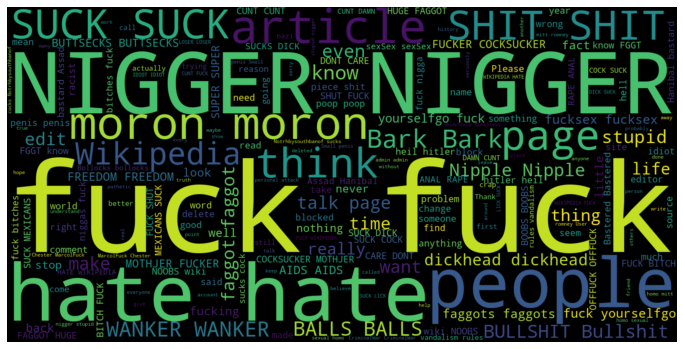

In [105]:
wordcloud_generator(toxic)

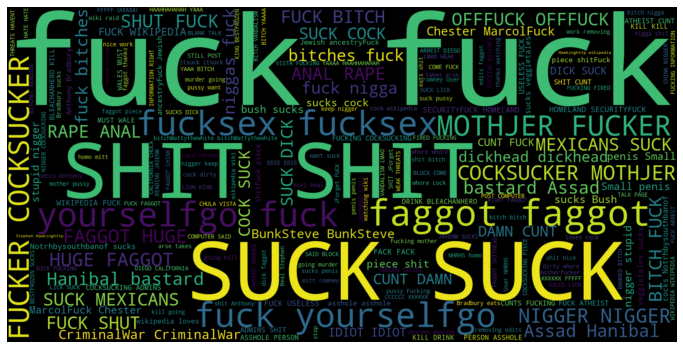

In [106]:
wordcloud_generator(severe_toxic)

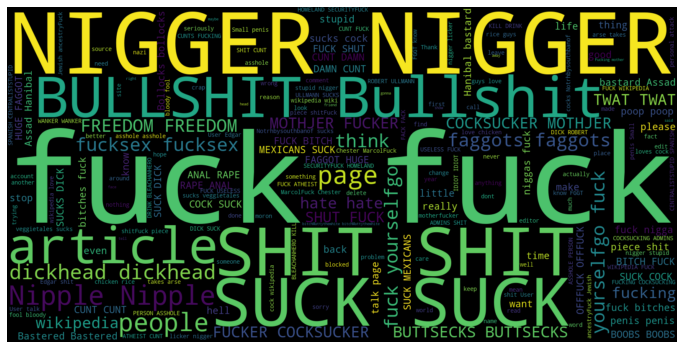

In [107]:
wordcloud_generator(obscene)

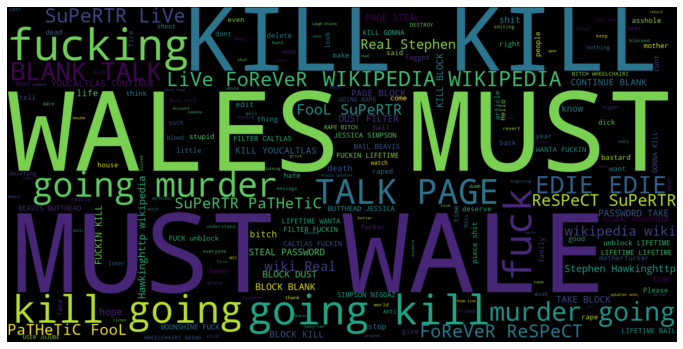

In [108]:
wordcloud_generator(threat)

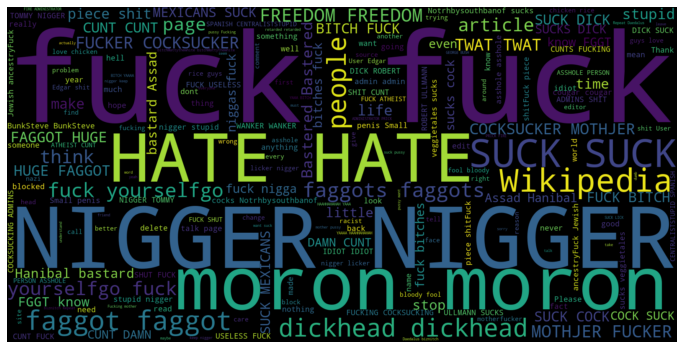

In [109]:
wordcloud_generator(insult)

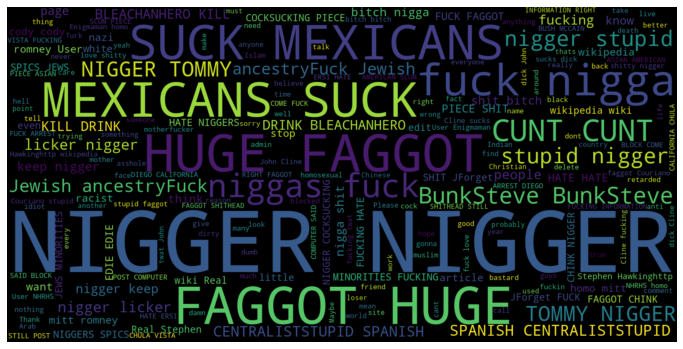

In [110]:
wordcloud_generator(identity_hate)

In [46]:
train_text = training['comment_text']
val_text = validation['comment_text']
print((train_text.shape),(val_text.shape))

(159571,) (153164,)


In [25]:
import tensorflow_hub as hub
import tensorflow as tf
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_text[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[-0.1560477 ,  0.12256067, -0.268096  , -0.2627112 , -0.0542577 ,
         0.22385693,  0.10146081, -0.08480132,  0.28958517,  0.1109538 ,
         0.30124626,  0.2183358 ,  0.02512136, -0.24469686,  0.01844997,
         0.10748149,  0.2858642 , -0.03842012,  0.10874421, -0.01437655,
        -0.14863989,  0.13071384, -0.07975119,  0.13562775, -0.34796292,
        -0.0594612 , -0.19925131, -0.20582308,  0.2591638 ,  0.09974837,
         0.0317237 , -0.10172857, -0.23095591, -0.05255567, -0.00675443,
        -0.10576075, -0.11114457,  0.05546004, -0.32340875,  0.2239309 ,
         0.02785858,  0.1399169 ,  0.13681261,  0.01910052, -0.32932985,
         0.03529495, -0.34263238, -0.02556897,  0.54254967, -0.08904789],
       [ 0.01791948,  0.08867052, -0.11843541, -0.00250252, -0.15941492,
        -0.03331381,  0.1217187 , -0.13493657, -0.17525125, -0.12197753,
         0.37167215,  0.15309705,  0.03353596,  0.15122262, -0.03984993,
 

In [26]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(6))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 102       
Total params: 48,191,518
Trainable params: 48,191,518
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

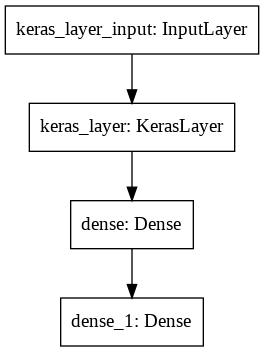

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [50]:
#we need to combine val together; not doing that rn
history = model.fit(train_text, labels, validation_split = 0.2, epochs=10, batch_size=32)

Epoch 1/10
3990/3990 [==============================] - 116s 29ms/step - loss: 0.0551 - accuracy: 0.9813 - val_loss: 0.0624 - val_accuracy: 0.9796
Epoch 2/10
3990/3990 [==============================] - 115s 29ms/step - loss: 0.0404 - accuracy: 0.9853 - val_loss: 0.0682 - val_accuracy: 0.9794
Epoch 3/10
3990/3990 [==============================] - 116s 29ms/step - loss: 0.0305 - accuracy: 0.9886 - val_loss: 0.0781 - val_accuracy: 0.9783
Epoch 4/10
3990/3990 [==============================] - 115s 29ms/step - loss: 0.0236 - accuracy: 0.9913 - val_loss: 0.0928 - val_accuracy: 0.9778
Epoch 5/10
3990/3990 [==============================] - 116s 29ms/step - loss: 0.0186 - accuracy: 0.9934 - val_loss: 0.1046 - val_accuracy: 0.9770
Epoch 6/10
3990/3990 [==============================] - 115s 29ms/step - loss: 0.0150 - accuracy: 0.9948 - val_loss: 0.1206 - val_accuracy: 0.9771
Epoch 7/10
3990/3990 [==============================] - 115s 29ms/step - loss: 0.0126 - accuracy: 0.9958 - val_loss: 0

In [51]:
#mount to google drive so we can save our model there
from google.colab import drive
drive.mount('/content/drive')
path = path = F"/content/drive/My Drive/ToxicCommentHateSpeech" 

Mounted at /content/drive


In [52]:
model.save(path)

INFO:tensorflow:Assets written to: /content/drive/My Drive/ToxicCommentHateSpeech/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ToxicCommentHateSpeech/assets


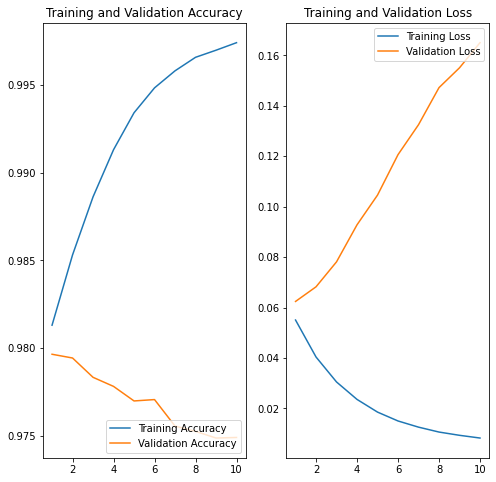

In [53]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, 11)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [148]:
def feedback(input): 
  print("\nresults for","'",input,"'")
  predictions = model.predict(np.expand_dims(input, 0))
  if ((predictions[0])[0]) > 0:
    print(" toxic", end =" ")
  if ((predictions[0])[1]) > 0:
    print(" severe_toxic", end =" ")
  if ((predictions[0])[2]) > 0:
    print(" obscene", end =" ")
  if ((predictions[0])[3]) > 0:
    print(" threat", end =" ")
  if ((predictions[0])[4]) > 0:
    print(" insult", end =" ")
  if ((predictions[0])[5]) > 0:
    print(" identity_hate", end =" ")
    
examples = [
            'lets kill blacks and kill them for fun #killblacks', 
            'jews are a virus', 
            'i fucked ur mom raw'
            ]
            
for i in range(len(examples)):
  feedback(examples[i])
#feedback(example2)


results for ' lets kill blacks and kill them for fun #killblacks '
 toxic 
results for ' jews are a virus '
 toxic  identity_hate 
results for ' i fucked ur mom raw '
 toxic  obscene  insult 